In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("testdataposts.csv")

In [45]:
print(df.head())

                        _id              date_created thumbnails  \
0  5f33beb63e4641464db6912e  2020-11-09T19:07:23.000Z         []   
1  5f33beb63e4641464db69130  2020-01-25T19:10:03.000Z         []   
2  5f33beb63e4641464db69132  2020-01-25T19:12:38.000Z         []   
3  5f33beb63e4641464db69134  2020-01-25T19:14:46.000Z         []   
4  5f33beb63e4641464db69135  2020-01-28T18:58:05.000Z         []   

                                          image_path  \
0  ["https://cdn.revmeup.in/userphotos/h9Rgve39XZ...   
1  ["https://cdn.revmeup.in/userconvertedphotos/W...   
2  ["https://cdn.revmeup.in/userphotos/WYc8FWvDoM...   
3  ["https://cdn.revmeup.in/userphotos/h9Rgve39XZ...   
4  ["https://cdn.revmeup.in/userphotos/WYc8FWvDoM...   

                            caption comments  design  isApproved  \
0  ROAM to your hearts content.\n\n       []       5       False   
1          Apple iPhone XR - REVIEW       []       5       False   
2                one plus 7T review       []      

In [46]:
print(df.shape)


(358, 21)


In [47]:
print(df.columns)


Index(['_id', 'date_created', 'thumbnails', 'image_path', 'caption',
       'comments', 'design', 'isApproved', 'likes', 'order', 'performance',
       'post_id', 'product_id', 'rating', 'review', 'reviewType', 'software',
       'tags', 'userid', 'valueformoney', '__v'],
      dtype='object')


In [48]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            358 non-null    object
 1   date_created   358 non-null    object
 2   thumbnails     358 non-null    object
 3   image_path     358 non-null    object
 4   caption        358 non-null    object
 5   comments       358 non-null    object
 6   design         358 non-null    int64 
 7   isApproved     358 non-null    bool  
 8   likes          358 non-null    object
 9   order          358 non-null    int64 
 10  performance    358 non-null    int64 
 11  post_id        358 non-null    object
 12  product_id     336 non-null    object
 13  rating         358 non-null    int64 
 14  review         358 non-null    object
 15  reviewType     358 non-null    object
 16  software       358 non-null    int64 
 17  tags           358 non-null    object
 18  userid         358 non-null   

In [49]:
df.drop(['image_path','comments','design','isApproved','likes','order','reviewType','software'],inplace=True,axis=1)

In [50]:
#No of unique customers and products
print("Unique Customers: ",df.userid.nunique())
print("Unique Products: ",df.product_id.nunique())

Unique Customers:  80
Unique Products:  233


In [51]:
#Top users, rated good on average
data_user_rate=pd.DataFrame(df.groupby('userid')['rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_user_rate.head(20)

,mean,count
userid,,
d49QrLhFunX3OkT6qmDOGuix9sY2,3.884615,52
ZKh5adE6Lvb2lQGrru9LEKWQUXq2,4.440000,25
SZhpkGLrFIgpAY9IwH00W6PhiLw2,3.086957,23
h9Rgve39XZOuEgGs2aeHBYIFdfO2,4.142857,21
WYc8FWvDoMhO1NmMuC8EyuK1b6L2,4.722222,18
QEuXoC2VQVf3uWAj43CtW3Tgvh53,4.125000,16
m0j3eFDu3uMvGPvaNf9iR4dhoLR2,4.583333,12
fcWZ83mRpINYbyIjDfpGorQj3iF2,3.916667,12
AWeQqaA8UYgx73S7qeqssfrzdHZ2,4.818182,11


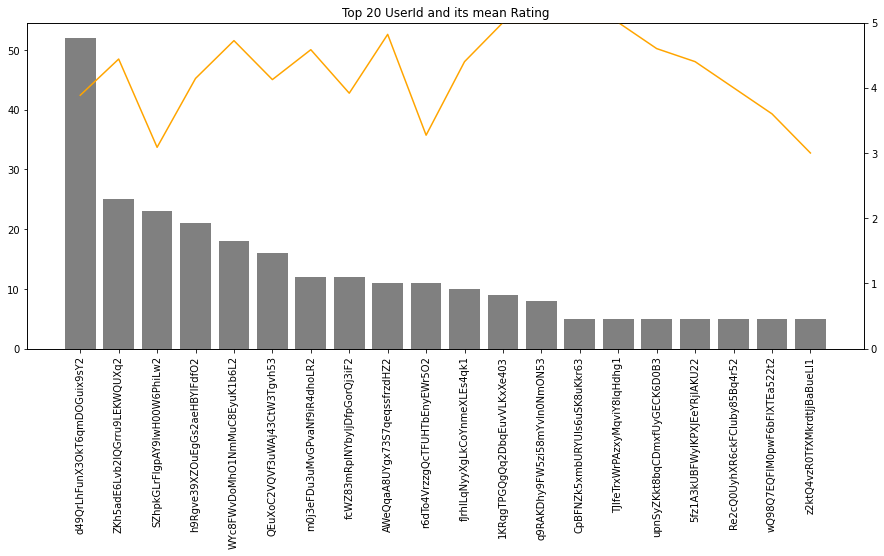

In [52]:
#Top 20 users basis no of ratings provided and average rating
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_user_rate.index,data_user_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_user_rate.index,data_user_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 UserId and its mean Rating")
plt.show()

In [53]:
#Top products bought have been rated as good on average 
data_prod_rate=pd.DataFrame(df.groupby('product_id')['rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_prod_rate.head(20)

,mean,count
product_id,,
YGYPTKILDGIKUKKHUN,5.000000,6
-M0cx49zcauMSee0wFUA,4.500000,6
QQGGRFINRXGKLEDRKO,4.000000,5
JAOUEWTLSTFVWAAXAV,5.000000,4
e4lqbwua3f0ij1o,5.000000,4
MSRIAEGQAYHLJOWGLH,4.750000,4
BZTBBEQVYDQUEJOLMH,4.000000,4
VRQTLFZMYLUHCBYTQE,3.500000,4
CEWITAENDICGJKQBKN,3.250000,4


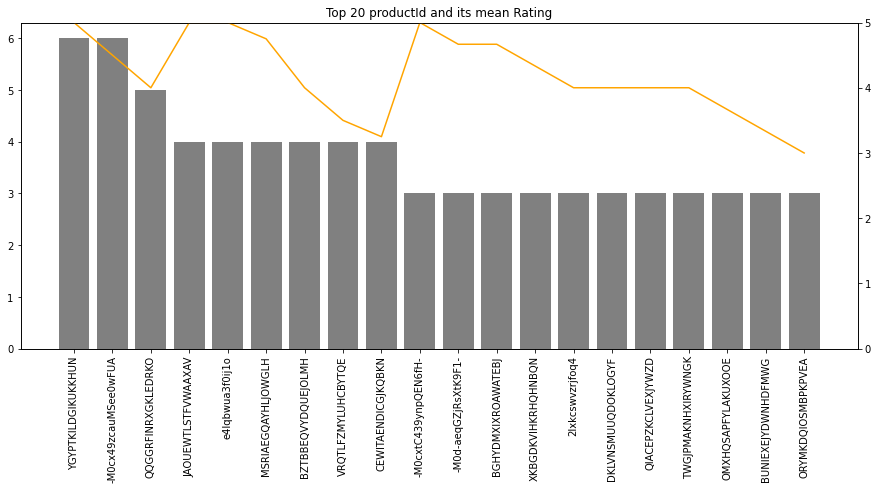

In [54]:
#Top 20 products basis no of ratings provided and average rating
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_prod_rate.index,data_prod_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_prod_rate.index,data_prod_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 productId and its mean Rating")
plt.show()

5    172
4    118
3     28
1     21
0     12
2      7
Name: rating, dtype: int64


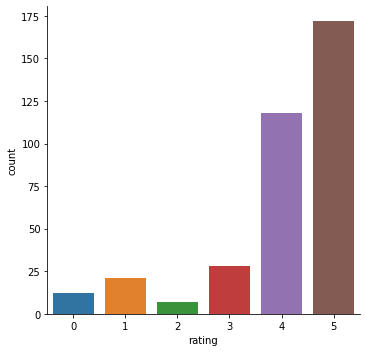

In [55]:
#Rating value_count, most ratings are either 4 or 5.
print(df.rating.value_counts())
sns.catplot("rating",data=df,kind='count')

In [56]:
from sklearn.model_selection import train_test_split
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(df, test_size = 0.3, random_state=10)
train_data.head()

,_id,date_created,thumbnails,caption,performance,post_id,product_id,rating,review,tags,userid,valueformoney,__v
139,5f33beb93e4641464db69380,2020-06-28T10:31:56.000Z,[],Sound quality is pretty good. Accessible at a ...,5,-MAtIPjeUxPcdn4tWJWk,ULUZBLROAIWRLLVXCW,4,false,Sound quality is pretty good. Accessible at a ...,wQ98Q7EQFlM0pwF6bFIXTEa522t2,4,0
247,5f7e978f82e9e3f34aecc3dd,2020-10-08T10:07:34.000Z,[],rotation test,0,-MJ5V-DSDABCrzxojRSp,-MEmajfhJQyboWfXSSSf,4,false,rotation test,d49QrLhFunX3OkT6qmDOGuix9sY2,0,0
191,5f5637763c9a9004ca89717a,2020-09-07T19:06:53.000Z,[],Still using after for three years. I have repl...,4,-MGcm9LEE_u5A72MWyND,motorola6,4,false,Still using after for three years. I have repl...,fJrhILqNyyXgLkCoYnmeXLEs4qk1,4,0
157,5f4bf449ca69f00eaf15d81c,2020-08-31T00:17:37.000Z,[],Heh,4,-MG-gYtH1R9_w1UErS4N,-M0fuvoTz5s1bA_RFs2O,5,false,Heh,m0j3eFDu3uMvGPvaNf9iR4dhoLR2,0,0
36,5f33beb63e4641464db69177,2020-02-01T16:33:53.000Z,[],This 360° speaker was engineered to spread dee...,0,-M--Py67kdrHqB-PkWul,IRDZMQECXVATBDJJXR,4,false,This 360° speaker was engineered to spread dee...,upnSyZKkt8bqCDmxfUyGECK6D0B3,0,0


# Popularity Based model

In [57]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('product_id').agg({'userid':'count','rating':'mean'}).reset_index()
train_data_grouped.rename(columns={'userid':'count','rating':'mean'},inplace=True)
train_data_grouped.head()

,product_id,count,mean
0,-M0cx49zcauMSee0wFUA,6,4.5
1,-M0d-aeqGZjRsXtK9F1-,1,5.0
2,-M0d5gXvCPKCz-c4iL-r,2,4.5
3,-M0fuvoTz5s1bA_RFs2O,1,5.0
4,-M0fytu5_EH6LEWQze4A,1,5.0


In [58]:
#Sort the songs on recommendation score 
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,product_id,count,mean,Rank
0,-M0cx49zcauMSee0wFUA,6,4.500000,1.0
105,YGYPTKILDGIKUKKHUN,5,5.000000,2.0
67,JAOUEWTLSTFVWAAXAV,4,5.000000,3.0
94,VRQTLFZMYLUHCBYTQE,4,3.500000,4.0
85,QQGGRFINRXGKLEDRKO,3,3.333333,5.0


In [59]:

# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userid'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [60]:
find_recom = [1267,385,40]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with there mean rating:\n")
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId:  1267
The products are most sold along with there mean rating:

     userid            product_id  count      mean  Rank
0      1267  -M0cx49zcauMSee0wFUA      6  4.500000   1.0
105    1267    YGYPTKILDGIKUKKHUN      5  5.000000   2.0
67     1267    JAOUEWTLSTFVWAAXAV      4  5.000000   3.0
94     1267    VRQTLFZMYLUHCBYTQE      4  3.500000   4.0
85     1267    QQGGRFINRXGKLEDRKO      3  3.333333   5.0


Here is the recommendation for the userId:  385
The products are most sold along with there mean rating:

     userid            product_id  count      mean  Rank
0       385  -M0cx49zcauMSee0wFUA      6  4.500000   1.0
105     385    YGYPTKILDGIKUKKHUN      5  5.000000   2.0
67      385    JAOUEWTLSTFVWAAXAV      4  5.000000   3.0
94      385    VRQTLFZMYLUHCBYTQE      4  3.500000   4.0
85      385    QQGGRFINRXGKLEDRKO      3  3.333333   5.0


Here is the recommendation for the userId:  40
The products are most sold along with there mean rat

<ipython-input-59-deea86202cef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userid'] = user_id
<ipython-input-59-deea86202cef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_recommendations['userid'] = user_id
<ipython-input-59-deea86202cef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Popularity based recommendation gives same recommendation to all. It ignores user preference or choices. It might be good for some new user who does not specify prefrences. But not much can be done in this.

# Content based

In [61]:
features1 = ['caption', 'review','tags']


In [62]:
def combine_features(row):
    return row['caption']+" "+row['review']+" "+row['tags']

In [63]:
for feature in features1:
    df[feature] = df[feature].fillna('') #filling all NaNs with blank string

df["combine_features"] = df.apply(combine_features,axis=1)

In [64]:
df.iloc[0].combine_features

"ROAM to your hearts content.\n\n Really an amazing portable device for music lovers.\nThe best thing is that the product has \na very good battery life.\nIt's waterproof and has a very crystal clear\nsound.\nA must buy product by mivi.\n ROAM to your hearts content.\n\n"

In [65]:
cosine_similarities = linear_kernel(count_matrix, count_matrix)


NameError: name 'count_matrix' is not defined

In [25]:
results = {}


In [26]:
for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], df['_id'][i]) for i in similar_indices]

    results[row['_id']] = similar_items[1:]

NameError: name 'cosine_similarities' is not defined

In [27]:
def item(_id):
    print("product ID is :" + _id )
    return df.loc[df['_id'] == _id]['combine_features'].tolist()[0].split(' - ')[0]

In [28]:
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")" )
        print("/////////")

In [29]:
recommend(item_id= "5f33beb63e4641464db69134" , num=3)

product ID is :5f33beb63e4641464db69134
Recommending 3 products similar to An amazing device for you. false An amazing device for you....
-------


KeyError: '5f33beb63e4641464db69134'

# Collaborative Filtering using SVD

In [30]:
final_ratings_matrix = pd.pivot_table(df,index='userid',columns='product_id',values = 'rating').fillna(0)


In [31]:
#Checking the density of rated products. User provided ratings to very less products or we can also say they didint bought 
#those products
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  310
possible_num_of_ratings =  18640
density: 1.66%


In [32]:

# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userid,0R7iqul8FQhrwpICUGXYCjquyov2,1CnFlxwVPGSVEeysy31AVux1kJ03,1KRqgTPGQgQq2DbqEuvVLKxXe403,2NmT84r2ARYZFvOlCVdW1C2URh43,4FRkWL5h63aogUiai9LC35b3kAy2,4LJ7MYPA2yTIrSeroU3B6bL1tHM2,5fz1A3kUBFWylKPXJEeYRjlAKU22,5xIL1hPxnXUfdR9MnzD5wcbxeCs2,6rCIhBFLPran9e9ygpku2WnYf602,77S2F1NbwRN4FvlkINKIhyBebUA3,...,ulLJBJGHojgn2KvxQspao2wAMg02,upnSyZKkt8bqCDmxfUyGECK6D0B3,uxDfyfrP6Mf1X3uhyHuewnqBpxp2,wQ98Q7EQFlM0pwF6bFIXTEa522t2,ww8bioEHCOPoQYG7u6POfdDDIq73,xY9iQDEl1lOmZo0JnjvK9ISxMXB2,yiVHnU1UBUaTCoqIjNY2OWgTVPs2,z2ktQ4vzR0TfXMkrdtJjBaBueLl1,z8L8fqGpjnfAVYV2F74wraOBNQy2,zxFQnaQxepUmdNURGYTQdnury3x1
product_id,,,,,,,,,,,,,,,,,,,,,
-M0cx49zcauMSee0wFUA,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-M0cxtC439ynpQEN6fH-,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-M0d-aeqGZjRsXtK9F1-,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-M0d5gXvCPKCz-c4iL-r,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-M0fuvoTz5s1bA_RFs2O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
train_final_ratings_matrix = pd.pivot_table(train_data,index='userid',columns='product_id',values = 'rating').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test_data,index='userid',columns='product_id',values = 'rating').fillna(0)

In [34]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

product_id,-M0cx49zcauMSee0wFUA,-M0d-aeqGZjRsXtK9F1-,-M0d5gXvCPKCz-c4iL-r,-M0fuvoTz5s1bA_RFs2O,-M0fytu5_EH6LEWQze4A,-M1xjDFkXCmOGH4v5M8t,-MEmajdI6Tzzl4l1EpBl,-MEmajdU5c3v0fyUvImo,-MEmajdZOpR0kaN-PNnO,-MEmajdcSeIaYSLuYEOQ,...,wqy3v8fs0gbkrx1,wth3o1ivp0rqge4,wvh74dk9gucorp5,wz15ry79o3gcjdi,xoutb3dwi4s5frl,xuj5bw3cdimn8aq,y51t7vaingdr4se,zgwhp5143n280mv,zktd5w162nixgq9,user_index
userid,,,,,,,,,,,,,,,,,,,,,
1CnFlxwVPGSVEeysy31AVux1kJ03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1KRqgTPGQgQq2DbqEuvVLKxXe403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2NmT84r2ARYZFvOlCVdW1C2URh43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5fz1A3kUBFWylKPXJEeYRjlAKU22,4.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5xIL1hPxnXUfdR9MnzD5wcbxeCs2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6rCIhBFLPran9e9ygpku2WnYf602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7X3j6FquqFYd6GBQrnHawURwI3n2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
7qEozHWPA7ZWUe1qt8M3wiGKkRU2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7yOU0iBb5Ye1KrGc8yygIDwKTBS2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [35]:
#Test Data
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()


product_id,-M0cxtC439ynpQEN6fH-,-M0d-aeqGZjRsXtK9F1-,-M0fytu5_EH6LEWQze4A,-MEmajdGG8OKhjOUvHkk,-MEmajdZOpR0kaN-PNnO,-MEmajdml0i3WuYSBneH,-MEmajfjM7g67IrLZrEX,1gpw9zo7uqvsmxa,1i75pdafs0qkuo9,1te4lbcd8a9xou3,...,sonya,syhpu25im43l1rv,t3p5fukl6id04vh,trkgboqsep4yvzc,uce4yzgn5wjh8sl,vieo2mzu3pfg0q8,wa8340fcrl7vye6,wbo5z7fl4qhprca,zbcj7rila1gh92p,user_index
userid,,,,,,,,,,,,,,,,,,,,,
0R7iqul8FQhrwpICUGXYCjquyov2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1KRqgTPGQgQq2DbqEuvVLKxXe403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4FRkWL5h63aogUiai9LC35b3kAy2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4LJ7MYPA2yTIrSeroU3B6bL1tHM2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
5fz1A3kUBFWylKPXJEeYRjlAKU22,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [36]:
#Complete data
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head()

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head()


product_id,-M0cxtC439ynpQEN6fH-,-M0d-aeqGZjRsXtK9F1-,-M0fytu5_EH6LEWQze4A,-MEmajdGG8OKhjOUvHkk,-MEmajdZOpR0kaN-PNnO,-MEmajdml0i3WuYSBneH,-MEmajfjM7g67IrLZrEX,1gpw9zo7uqvsmxa,1i75pdafs0qkuo9,1te4lbcd8a9xou3,...,sngjqw3zepkbi7r,sonya,syhpu25im43l1rv,t3p5fukl6id04vh,trkgboqsep4yvzc,uce4yzgn5wjh8sl,vieo2mzu3pfg0q8,wa8340fcrl7vye6,wbo5z7fl4qhprca,zbcj7rila1gh92p
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [38]:
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)
train_preds_df.head()

product_id,-M0cx49zcauMSee0wFUA,-M0d-aeqGZjRsXtK9F1-,-M0d5gXvCPKCz-c4iL-r,-M0fuvoTz5s1bA_RFs2O,-M0fytu5_EH6LEWQze4A,-M1xjDFkXCmOGH4v5M8t,-MEmajdI6Tzzl4l1EpBl,-MEmajdU5c3v0fyUvImo,-MEmajdZOpR0kaN-PNnO,-MEmajdcSeIaYSLuYEOQ,...,wbo5z7fl4qhprca,wqy3v8fs0gbkrx1,wth3o1ivp0rqge4,wvh74dk9gucorp5,wz15ry79o3gcjdi,xoutb3dwi4s5frl,xuj5bw3cdimn8aq,y51t7vaingdr4se,zgwhp5143n280mv,zktd5w162nixgq9
0,4.968198e-02,-3.300102e-03,5.943112e-02,-1.524470e-02,-1.038635e-03,5.173513e-17,-1.722476e-02,-1.219576e-02,5.331683e-02,-3.300102e-03,...,3.998763e-02,6.162512e-04,-4.242489e-03,6.664604e-02,1.784644e-03,-5.303111e-03,1.784644e-03,1.273277e-19,6.664604e-02,-3.518467e-03
1,-2.887128e-04,2.317844e-04,-9.457627e-04,1.198016e-03,6.199631e-05,-7.140813e-16,1.337086e-03,9.584126e-04,-1.254663e-03,2.317844e-04,...,-9.409971e-04,-6.764356e-05,2.338875e-04,-1.568328e-03,-3.764237e-04,2.923594e-04,-3.764237e-04,-1.157894e-17,-1.568328e-03,-8.406431e-05
2,1.786325e-04,-2.349768e-06,1.783934e-04,-1.247452e-04,1.972293e-05,-3.223214e-17,-1.261551e-04,-9.979620e-05,1.845054e-04,-2.349768e-06,...,1.383790e-04,2.390527e-05,-2.497980e-05,2.306317e-04,2.207070e-05,-3.122474e-05,2.207070e-05,-8.696165e-18,2.306317e-04,-9.154044e-06
3,2.175134e+00,4.226773e-01,6.544003e-02,1.319429e+00,2.871378e-01,5.347660e-16,1.573036e+00,1.055544e+00,6.475187e-02,4.226773e-01,...,4.856390e-02,-8.248544e-03,-6.548046e-03,8.093984e-02,4.882734e-03,-8.185058e-03,4.882734e-03,5.513599e-18,8.093984e-02,-3.302324e-03
4,-1.079717e-16,-2.009892e-17,5.013362e-17,-5.998592e-17,-1.418570e-17,-3.431168e-17,-7.204527e-17,-4.798873e-17,-7.383288e-18,-2.009892e-17,...,-5.537466e-18,9.368950e-18,1.332673e-16,-9.229110e-18,3.157175e-17,1.665841e-16,3.157175e-17,-4.217891e-33,-9.229110e-18,1.981559e-16


In [41]:

# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [40]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 4
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                      user_ratings  user_predictions
Recommended Items                                   
rlkyi6dgu7e4mxv                0.0          1.319429
5opektcznib0h4f                0.0          1.319429
3udft5vz4wlsr2e                0.0          1.319429
-M0fuvoTz5s1bA_RFs2O           0.0          1.319429
srwi6352ugvymxc                0.0          1.055544
